In [105]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [106]:
os.getcwd()
os.chdir(r'C:\Users\Nikhil Raj\Desktop\nikhu\csv files')

In [107]:
# dataset=https://archive.ics.uci.edu/ml/machine-learning-databases/00477/

In [108]:
df=pd.read_excel('Real estate.xlsx')
df.set_index('No',inplace=True)

In [109]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [110]:
df.isna().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [111]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [112]:
x=df.drop('Y house price of unit area',axis=1)
y=df['Y house price of unit area']

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
x_train_f,x_test,y_train_f,y_test=train_test_split(x,y)
x_train,x_valid,y_train,y_valid=train_test_split(x_train_f,y_train_f)

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [116]:
x_train.shape

(232, 6)

In [117]:
input_shape=x_train.shape[1:]
input_shape

(6,)

In [118]:
import tensorflow as tf
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(300,activation='relu',input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Dense(200,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [119]:
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))
history=model.fit(x_train,y_train,epochs=50,validation_data=(x_valid,y_valid))

Train on 232 samples, validate on 78 samples
Epoch 1/50
232/232 [==============================] - 1s 2ms/sample - loss: 84418.4510 - val_loss: 598.3123
Epoch 2/50
232/232 [==============================] - 0s 211us/sample - loss: 1626.1220 - val_loss: 1159.6421
Epoch 3/50
232/232 [==============================] - 0s 181us/sample - loss: 795.6795 - val_loss: 454.2748
Epoch 4/50
232/232 [==============================] - 0s 194us/sample - loss: 419.1464 - val_loss: 547.5031
Epoch 5/50
232/232 [==============================] - 0s 177us/sample - loss: 298.6183 - val_loss: 261.6247
Epoch 6/50
232/232 [==============================] - 0s 190us/sample - loss: 196.0830 - val_loss: 234.5652
Epoch 7/50
232/232 [==============================] - 0s 181us/sample - loss: 157.1647 - val_loss: 152.9964
Epoch 8/50
232/232 [==============================] - 0s 164us/sample - loss: 144.3863 - val_loss: 160.8459
Epoch 9/50
232/232 [==============================] - 0s 164us/sample - loss: 126.6010 - 

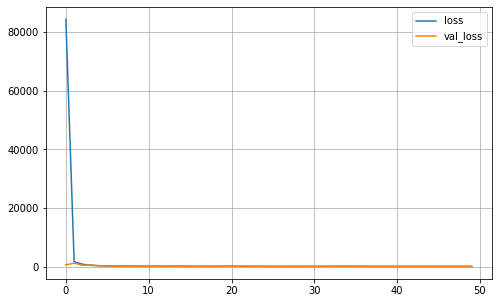

In [120]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

In [121]:
mse_test = model.evaluate(x_test, y_test)

104/104 [==============================] - 0s 85us/sample - loss: 171.2454
